In [ ]:
## All Predictive Models 
"""Models
# 1. Naïve Bayes: Count Vectorizer 
# 2. Naïve Bayes: TF IDF 
# 3. Gradient Boosted Classifier: Count Vectorizer 
# 4. Gradient Boosted Classifier: TF IDF"""

In [1]:
"""Import Packages"""
import pandas as pd
import os
import pickle
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [2]:
"""Import the Dataset"""
#df = pd.read_csv(r'/Users/rajsitee/Downloads/Eco395m-Final-Project-jordan/artifacts/mexican_reviews.csv')

PATH_IN = os.path.join('artifacts', 'mexican_reviews.csv')

df = pd.read_csv(PATH_IN)

In [3]:
"""Drop rows with no ratings. """
yelp_d = df[df.rating != 'no rating']

In [5]:
"""One-hot-encoding. 
For all ratings <= 3, rating_binary = 0. For all ratings >= 4, rating_binary = 1. """
def star_rating(x):

    if x.rating == '3 star rating':
        return 0
    elif x.rating == '2 star rating':
        return 0
    elif x.rating == '1 star rating':
        return 0
    elif x.rating == '4 star rating':
        return 1
    elif x.rating == '5 star rating':
        return 1
    else:
        return 0
yelp_d['rating_binary'] = yelp_d.apply(star_rating,axis = 1)

/var/folders/gs/rb1gz2h54pg2272k_2627jkw0000gn/T/ipykernel_2066/1479080751.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_d['rating_binary'] = yelp_d.apply(star_rating,axis = 1)


In [6]:
"""Create two new dataframes to hold all the positive and negative samples. We do this because the positive samples are
much higher than the nehative samples. So we randomly sample the no. of positive reviews to match the no. of negative reviews. 
We then create a new dataframe to hold these 2 dfs (using concatenate)."""
df_positive = yelp_d[yelp_d['rating_binary'] == 1]
df_positive_sample = df_positive.sample(n=21386)

df_negative = yelp_d[yelp_d["rating_binary"] == 0]
df_negative_sample = df_negative.sample(n=21386)

yelp_data = pd.concat([df_positive_sample, df_negative_sample], axis=0)


In [7]:
"""Train-test split + random state"""   
X = yelp_data.review
y = yelp_data.rating_binary
indices = yelp_data.index

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, train_size = 0.8, random_state = 7)
print(X_train)


21938    Meh. Get the suadero and carnitas. The other m...
50539    I just bought a steak and egg taco and the put...
44496    Tacorrido is the best for tacos on the run at ...
34100    Really enjoyed the food and drinks here on my ...
10605    Ok, so I must admit I'm not a huge proponent o...
                               ...                        
34508    So this place seemed like it was going to have...
4393     There's two one-way roads between California a...
63518    I have ordered here several times, it is alway...
67293    placed an online order and prepaid. when i get...
55287    Food is REALLY good.  The Mole is really good....
Name: review, Length: 34217, dtype: object


In [8]:
## Naive Bayes Count Vectorizer

In [9]:
"""Model Validation"""
steps = [('vec', CountVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 1000], 'nb__alpha':[0.01, 0.1, 1, 10, 1000]}

def new_func(pipeline, parameters):
    clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy")
    return clf

clf = new_func(pipeline, parameters) 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 1, 'vec__min_df': 1}

In [10]:
"""Save the file into an sav"""
filename = 'nb_cv.sav'
pickle.dump(clf, open(filename, 'wb'))

"""Load the model file"""
filename = 'nb_cv.sav'
clf = pickle.load(open(filename, 'rb'))

In [11]:
"""Results"""
results = clf.predict(X_test)

"""Test the Accuracy & the F1 Score of the Model"""
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)


Accuracy on test data:  0.8351841028638223
F1 Score (macro):  0.8347608023042462
F1 Score (micro):  0.8351841028638223
F1 Score (weighted):  0.8348849574337293


In [12]:
# Naive Bayes: TF IDF

In [13]:
"""Model Validation"""
steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100], 'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_


{'nb__alpha': 1, 'vec__min_df': 1}

In [14]:
"""Save the file into an sav"""
filename = 'nb_tf.sav'
pickle.dump(clf, open(filename, 'wb'))

"""Load the model file"""
filename = 'nb_tf.sav'
clf = pickle.load(open(filename, 'rb'))

In [15]:
"""Results"""
results = clf.predict(X_test)

"""Test the Accuracy & the F1 Score of the Model"""
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.842197545295149
F1 Score (macro):  0.842012226831661
F1 Score (micro):  0.8421975452951491
F1 Score (weighted):  0.8420925525820466


In [16]:
nb_tf_acc = test_accuracy
nb_tf_f1 = f1_accuracyw
nb_tf_f1m = f1_accuracym
nb_tf_f1w = f1_accuracyw

In [17]:
# Gradient Boosted Classifier: Count Vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier

steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(max_features='sqrt',n_estimators=500))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 3, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(learning_rate = 0.25, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.25,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [19]:
"""Save the file into an sav"""
filename = 'gbc_cv.sav'
pickle.dump(clf, open(filename, 'wb'))

"""Load the model file"""
filename = 'gbc_cv.sav'
clf = pickle.load(open(filename, 'rb'))

In [20]:
"""Results"""
results = clf.predict(X_test)

"""Test the Accuracy & the F1 Score of the Model"""
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.8308591466978376
F1 Score (macro):  0.8306040298065346
F1 Score (micro):  0.8308591466978374
F1 Score (weighted):  0.8307016197017018


In [21]:
gbc_cv_acc = test_accuracy
gbc_cv_f1 = f1_accuracy
gbc_cv_f1m = f1_accuracym
gbc_cv_f1w = f1_accuracyw

In [22]:
# Gradient Boosted Classifier: TF IDF

In [23]:
"""Model Validation"""
steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(max_features='sqrt',n_estimators=500))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 3, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(learning_rate = 0.25, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.25,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [24]:
"""Save the file into an sav"""
filename = 'gbc_tf.sav'
pickle.dump(clf, open(filename, 'wb'))

"""Load the model file"""
filename = 'gbc_tf.sav'
clf = pickle.load(open(filename, 'rb'))

In [25]:
"""Results"""
results = clf.predict(X_test)

"""Test the Accuracy & the F1 Score of the Model"""
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)


Accuracy on test data:  0.8213909994155465
F1 Score (macro):  0.8210898311340626
F1 Score (micro):  0.8213909994155465
F1 Score (weighted):  0.8211988008541438


In [26]:
gbc_tf_acc = test_accuracy
gbc_tf_f1 = f1_accuracy
gbc_tf_f1m = f1_accuracym
gbc_tf_f1w = f1_accuracyw

In [27]:
# Common Results

In [28]:
"""Aggregate Results"""

result2 = pd.DataFrame({'Model':['NB_CV', 'NB_TF', 'GBC_CV', 'GBC_TF'],
             'Accuracy':[nb_tf_acc,nb_tf_acc, gbc_cv_acc, gbc_tf_acc],
             'F1_Macro':[nb_tf_f1, nb_tf_f1, gbc_cv_f1, gbc_tf_f1],
             'F1_Micro':[nb_tf_f1m, nb_tf_f1m, gbc_cv_f1m, gbc_tf_f1m],
             'F1_Weighted':[nb_tf_f1w, nb_tf_f1w, gbc_cv_f1w, gbc_tf_f1w]})
result2 = result2.round(3)
result2

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,NB_CV,0.842,0.842,0.842,0.842
1,NB_TF,0.842,0.842,0.842,0.842
2,GBC_CV,0.831,0.831,0.831,0.831
3,GBC_TF,0.821,0.821,0.821,0.821


In [29]:
"""Confusion Matrix"""
cm = confusion_matrix(y_test, clf.predict(X_test), labels=None, sample_weight=None)
cm

cm_yelp_data =  pd.DataFrame(cm, index= [i for i in ['Negative','Positive']],
                     columns= [i for i in ['Negative','Positive']])

<AxesSubplot: >

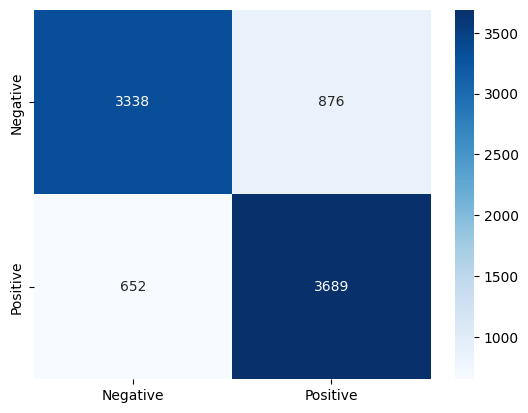

In [30]:
"""Heatmap"""
sns.heatmap(cm_yelp_data, annot=True,cmap='Blues',fmt='g')